# Import Files

In [1]:
from os import listdir
from os.path import isfile, join
mypath = "../images"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(str(len(file_names)) + ' images loaded')

93 images loaded


In [2]:
file_names[0]

'cat1.jpg'

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.applications.resnet50 import preprocess_input

import matplotlib.pyplot as plt
import numpy as np

import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Preprocess Image

In [4]:
#function to preprocess normal image 
def prepocessImage(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    frame = img
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    sensitivity = 156
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    ret, thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
    circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1.5, 100000,param1=80,param2=40,minRadius=0,maxRadius=0)
    x,y,r = 0,0,0
    if circles is not None:
      circles = np.uint16(np.around(circles))
      x,y,r = circles[0][0]
      x=int(x)
      y=int(y)
      r=int(r)
    mask = np.zeros((224,224), np.uint8)
    cv2.circle(mask,(x,y),r,(255,255,255),-1)
    masked_data = cv2.bitwise_and(frame, frame, mask=mask)
    _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
    cnt = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
    x,y,w,h = cv2.boundingRect(cnt[0])

    # Crop masked_data
    crop = masked_data[y:y+h,x:x+w]
    crop = cv2.resize(crop, (224,224), interpolation = cv2.INTER_AREA)
    #preprocess the image
    my_image = preprocess_input(crop)
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
#     my_image = img_to_array(crop)
#     plt.imshow(my_image)
#     my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
#     return my_image
    # preprocessed shape = (1,224,224,1)
    return crop

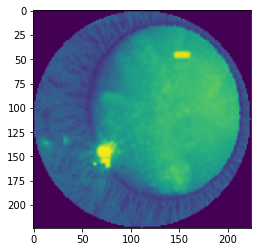

In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
plt.imshow(prepocessImage("../images/"+file_names[21]))

In [6]:
cv2.imread("../images/"+file_names[0])

array([[[172, 191, 234],
        [170, 191, 236],
        [167, 189, 237],
        ...,
        [106, 134, 195],
        [105, 133, 194],
        [104, 132, 193]],

       [[173, 192, 235],
        [171, 192, 237],
        [167, 189, 237],
        ...,
        [106, 134, 195],
        [105, 133, 194],
        [104, 132, 193]],

       [[172, 193, 238],
        [170, 193, 239],
        [167, 190, 238],
        ...,
        [106, 134, 195],
        [105, 133, 194],
        [104, 132, 193]],

       ...,

       [[110, 151, 214],
        [110, 151, 214],
        [110, 151, 214],
        ...,
        [121, 159, 223],
        [122, 160, 224],
        [118, 156, 220]],

       [[110, 151, 214],
        [110, 151, 214],
        [110, 151, 214],
        ...,
        [123, 161, 225],
        [124, 162, 226],
        [120, 158, 222]],

       [[110, 151, 214],
        [110, 151, 214],
        [110, 151, 214],
        ...,
        [125, 163, 227],
        [126, 164, 228],
        [122, 160, 224]]

# Sift and Glcm 

In [7]:
import cv2
import numpy as np
from skimage.feature import  graycomatrix, graycoprops
images_sift = []
glcm=[]
labels = []
size = 128
sift = cv2.SIFT_create()
cataract=0
normal=0
for i, file in enumerate(file_names):
        image = cv2.imread(mypath+"/"+file,0)
        h,w=image.shape
#         if(h>128 and w>128):
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        img_arr = np.array(image)
        gCoMat = graycomatrix(img_arr, [1], [0],256,symmetric=True, normed=True) # Co-occurance matrix
        contrast = graycoprops(gCoMat, prop='contrast')[0][0]
        dissimilarity = graycoprops(gCoMat, prop='dissimilarity')[0][0]
        homogeneity = graycoprops(gCoMat, prop='homogeneity')[0][0]
        energy = graycoprops(gCoMat, prop='energy')[0][0]
        correlation = graycoprops(gCoMat, prop='correlation')[0][0]
        keypoints, descriptors = sift.detectAndCompute(image,None)
        descriptors=np.array(descriptors)
        descriptors=descriptors.flatten()
        glcm.append([contrast,dissimilarity,homogeneity,energy,correlation])
        images_sift.append(descriptors[:2304])

        #print(descriptors.shape)
        if file_names[i][0] == "c":
            cataract+=1
            labels.append(1)
        if file_names[i][0] == "n":
            normal+=1
            labels.append(0)

print("Testing and validation split done!")


Testing and validation split done!


In [8]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
len(labels)

93

In [10]:
images_sift=np.array(images_sift)
images_sift.shape

(93, 2304)

In [11]:
glcm=np.array(glcm)
images_sift_glcm=np.concatenate((images_sift,glcm),axis=1)
images_sift_glcm.shape

(93, 2309)

In [12]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# rf_class = RandomForestClassifier(n_estimators=100, criterion='entropy',max_features='sqrt', max_depth=3, n_jobs=2,
# random_state=1337)
# svm_poly=svm.SVC(kernel='poly',gamma=0.1,C=10)
# knn= KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2) 
log = LogisticRegression(solver='saga',penalty='l1')

# model_names={"Random Forest":rf_class,"SVM":svm_poly,"k nearest neighbor":knn,"logistic regression":log}

In [13]:
# def testing(model_name,X_train, X_test, y_train, y_test):
#     model=model_names[model_name]
#     model.fit(X_train,y_train)
#     yhat = model.predict(X_test)
#     # evaluate predictions
#     acc = accuracy_score(y_test, yhat)
#     print(model_name,'\tAccuracy: %.3f' % acc)
#     print(confusion_matrix(y_test, yhat))
#     print("\n\n")

In [14]:
# def result(dataset):
#     #Normalization
#     #min_max_scaler = preprocessing.StandardScaler()
#     #x_scaled = min_max_scaler.fit_transform(dataset)
    
    
#     #panda dataframe 
#     df=pd.DataFrame(data=dataset)
#     df['label']=labels
#     df=df.sample(frac=1)
#     X=df.drop(['label'], axis = 1)
#     y=df['label']
    
    
#     #Different model
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#     for model in ["Random Forest","SVM","k nearest neighbor","logistic regression"]:
#         testing(model,X_train, X_test, y_train, y_test)

In [15]:
df=pd.DataFrame(data=images_sift_glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']
#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
log.fit(X_train,y_train)
yhat = log.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('\tAccuracy: %.3f' % acc)
print(confusion_matrix(y_test, yhat))
print("\n\n")

	Accuracy: 0.792
[[ 6  3]
 [ 2 13]]





c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
# log = LogisticRegression(solver='sag',penalty='l2')
log.fit(X_train, y_train)
scores = cross_val_score(log, X_test, y_test, cv=5)
print(scores.mean())

c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.72


c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\girish\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Saving model

In [18]:
# from joblib import dump, load
# dump(log, 'Phase1.joblib')

In [19]:
# model = load('Phase1.joblib') 
# features = np.array([images_sift_glcm[67]])
# print(model.predict(features))

# Test model

In [20]:
# glcm_test, images_sift_test =[],[]
# glcm_sift_test = []

In [21]:
# image = cv2.imread('test1.jpg')
# # h,w=image.shape
# # if(h>128 and w>128):
# image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
# img_arr = np.array(image)
# gCoMat = graycomatrix(img_arr, [1], [0],256,symmetric=True, normed=True) # Co-occurance matrix
# contrast = graycoprops(gCoMat, prop='contrast')[0][0]
# dissimilarity = graycoprops(gCoMat, prop='dissimilarity')[0][0]
# homogeneity = graycoprops(gCoMat, prop='homogeneity')[0][0]
# energy = graycoprops(gCoMat, prop='energy')[0][0]
# correlation = graycoprops(gCoMat, prop='correlation')[0][0]
# keypoints, descriptors = sift.detectAndCompute(image,None)
# descriptors=np.array(descriptors)
# descriptors=descriptors.flatten()
# glcm_test.append([contrast,dissimilarity,homogeneity,energy,correlation])
# images_sift_test.append(descriptors[:2304])

In [22]:
# from matplotlib import pyplot as plt
# image = cv2.imread('test1.jpg')
# # plt.imshow(image)
# image

In [23]:
# size